##  Lab: Multivariable Linear Regression
Objectives: Implement linear regression with multiple variables (features) and get to see it works on data. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file **Multi_linear.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.  

Load the data into the variable data (using function pd.read_csv from panda library). 

In [11]:
data= pd.read_csv('Multi_linear.txt')

In [4]:
#a few examples from the dataset 
data.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [12]:
#Some statistics
data.describe()

,2104,3,399900
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


### Plot the data

Create scatter plots of data similar to Fig.1 (using plt.scatter)

<img src="images/f5.png" style="width:650px;height:250px;">
<caption><center> Fig.1: Data visualtization </center></caption>

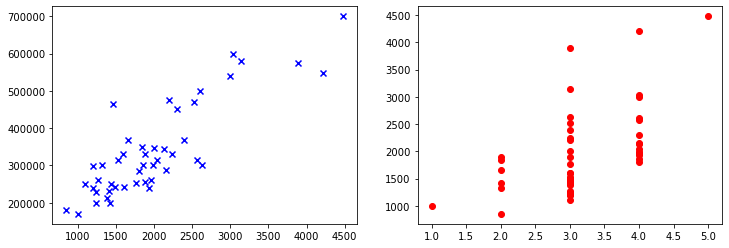

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,0], data.iloc[:,2], marker='x', color='blue')


plt.subplot(1, 2, 2)
plt.scatter(data.iloc[:,1], data.iloc[:,0], color='red')

### Feature Normalization

Note that house sizes are much larger values (about 1000 times) than the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. 
To make sure features are on a similar scale apply Mean normalization.

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

Your task is to complete the code in function **featureNormalization(X)**:

• Compute the mean value  $\mu_i$ of each feature (use np.mean(X,axis=0)) 

• compute the standard deviation $\sigma_i$ of each feature (use np.std(X,axis=0)) 

• Apply the equation above.

**REMARK !!!:** When normalizing the features, it is important to store the mean value and the standard deviation used for normalization. After optimizing the parameters of the model, you want to predict the price of a new example not seen before.
You must first normalize the features of that new example using the mean and standard deviation previously computed from the training set.

**Remark:** Mean normalization is an alternative to normalizing by making the absolute values < 1 (i.e. dividing by MaxValue-MinValue).

In [24]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

### Compute the Cost Function $J(\theta)$

The objective of Linear Regression is to minimize the cost function: $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$

where *h* is the linear model: $h_\theta(x)=\theta^Tx=\theta_0+\theta_1x_1+....+\theta_nx_n$ 

Complete function **computeCost(X,y,theta)**.  Remember that the variables X and y are not scalar values, X is an array (matrix) with dimension (*mx3*), y is an array (vector) with dimension (*mx1*), *m* rows represent the examples from the training set.

Suggestion: Use the vectorized dot product with *np.dot()* to generate *h*. 
Use *np.sum()* to compute the sum of errors over all given examples. 

In [28]:
def computeCost(X,y,theta):
    """
   Take the numpy arrays X, y, theta and return the cost function J for this theta. 

    """
    #number of training examples
    m = 100
    
    #linear regression model
    h = np.sum(np.dot(X,theta), axis=1)
    
    #cost function
    J = (1/(2*m))*np.sum(np.square(h-y))

    
    return J

Now you will provide values for the arguments of **computeCost(X,y,theta)**. 
First, extract X and y from data. 

**Check if y is rank 1 arrays (m,)**  and if yes, you need to reshape them to be 2-dimensonal arrays (m,1).  
Each example is stored as a row.  


In [ ]:
data_n=data.values # extract only the values of the two columns from the dataFrame data
X= ?
y= ?


#Run featureNormalization to normalize X, store the means and stds.
X, mean_X, std_X = ?


#To take into account the intercept term theta_0 you need to add an additional first column to X and 
#set it to all ones (np.ones). #This allows to treat theta_0 as simply another ‘feature parameter’. 

X=np.append(?,?) 

#Initialize the fitting parameters theta to 0 (np.zeros)

theta_init=

#You should see a cost of about  65591548106.46

computeCost(X,y,theta_init)

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating Equation        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$) and repeat unitil convergence. 


Implement gradient descent in the function **gradientDescent**. The loop structure is written, you need to supply the updates to $\theta$  within each iteration.  

In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy arrays X, y and theta and update theta by taking num_iters gradient steps with learning rate alpha
    
     Return: theta and the list of the cost of theta (J_history) during each iteration
    """
    
    #number of training examples
    m= ?
    J_history=[]
    
    for i in range(num_iters):
        
        # model
        h = ?
        
        #Vectorized way to compute all gradients simultaneously 
        grad = np.dot(X.transpose(),(h-y)) 
        
        #update 
        theta= ?
        
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

Apply gradientDescent with learning rate 0.1 and 400 iterations.

In [ ]:
theta, J_history = gradientDescent(?,?,?,?,?)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2")

### Testing the implementation

A good way to verify that gradient descent is working correctly is to plot $J(\theta)$ against the number of iteration. Function **gradientDescent** calls function **computeCost** on every iteration and saves the costs over the iterations. If the algorithm works properly, $J(\theta)$ should never increase, and should converge to a steady value. 

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> Fig. 2 Cost function for different learning rates </center></caption>

If the learning rate is too small (e.g. 0.001), the gradient descent takes a very long time to converge to the optimal value. 

If the learning rate is too large (e.g. 1.4), $J(\theta)$ can diverge and "blow up", resulting in values which are too large for computer calculations. In these situations, Python will return nan (not a number). This is often caused by undefined operations that involve +/- infinity.

Apply **gradientDescent** with different learning rates (e.g. alpha=[0.001, 0.01, 0.1, 0.3 1.4] ) and 400 iterations.

Plot the gradient history and get a curve similar to Fig.2. 



In [ ]:

alpha= ?

for i in alpha:
    theta_init=np.zeros((n+1,1))
    theta, J_history = gradientDescent(?,?,?,?,?)
     plt.plot(?)


### Make predictions  using the optimized $\theta$ values

Complete function **predict** to compute model predictions: $h_\theta(x) = \theta^Tx$. Apply vectorized computations with np.dot(). 

In [ ]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    # model
    h = ?
    
    return h

Using the best learning rate you found, run gradient descent until convergence to find the optimal $\theta$ values.

Predict the price of a house with 1650 square feet and 3 bedrooms (use function predict you have implemented in Part 1). 

Don't forget to normalize the features, before making this prediction!

Answer: the price is about $293080.0


In [ ]:
x_sample =?
#feature normalisation of x_sample
x_sample= ?
#add 1
x_sample=

predict3=predict(?,?)
print("For house size = 1650, # of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))